Information Gain for Outlook: 0.2754887502163468
Gini Gain for Outlook: 0.14999999999999997
Information Gain for Temperature: 0.12451124978365313
Gini Gain for Temperature: 0.08333333333333337
Information Gain for Humidity: 0.02904940554533142
Gini Gain for Humidity: 0.020000000000000018
Information Gain for Wind: 0.12451124978365313
Gini Gain for Wind: 0.08333333333333331


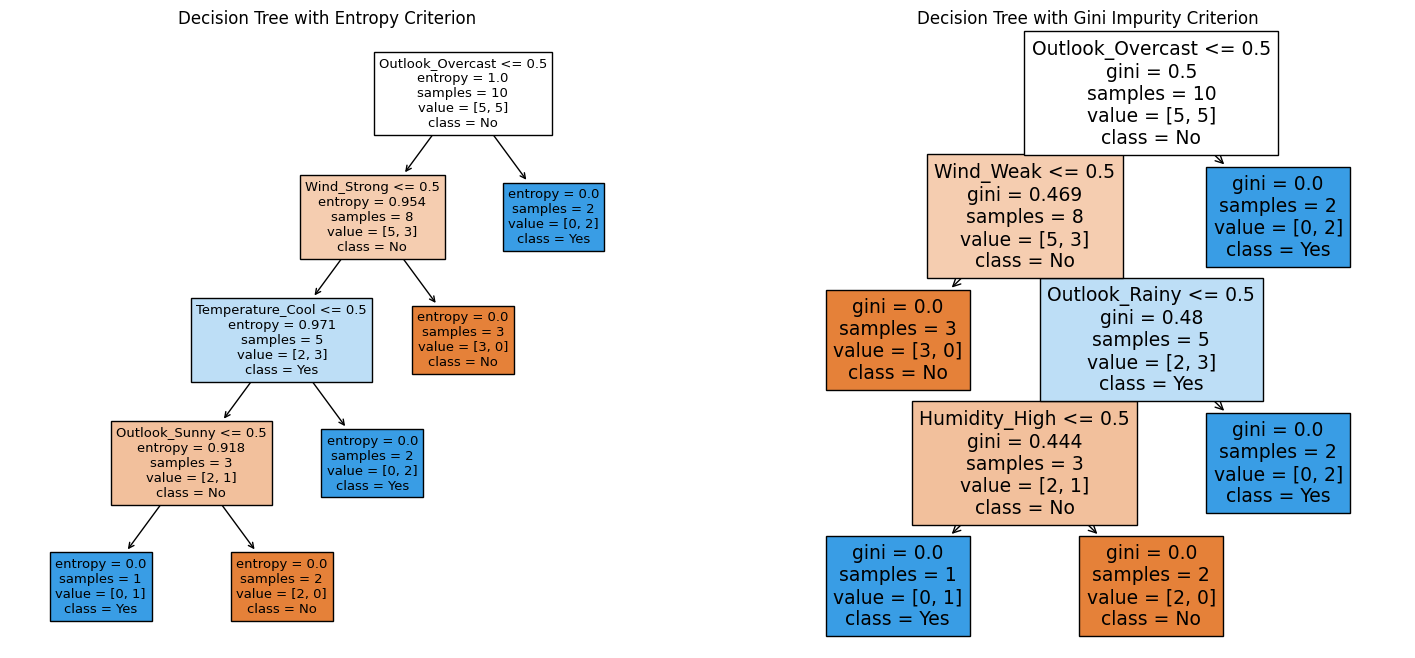

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

def entropy(data):
    unique_classes, class_counts = np.unique(data, return_counts=True)
    class_probabilities = class_counts / len(data)
    entropy = -np.sum(class_probabilities * np.log2(class_probabilities))
    return entropy

def gini_impurity(data):
    unique_classes, class_counts = np.unique(data, return_counts=True)
    class_probabilities = class_counts / len(data)
    gini = 1 - np.sum(np.square(class_probabilities))
    return gini

def information_gain(data, feature, target):

    total_entropy = entropy(target)

    unique_values = np.unique(data[feature])
    weighted_entropy = 0

    for value in unique_values:
        subset_indices = data[feature] == value
        subset_target = target[subset_indices]
        weight = len(subset_target) / len(target)
        weighted_entropy += weight * entropy(subset_target)

    information_gain = total_entropy - weighted_entropy
    return information_gain

def gini_gain(data, feature, target):
    total_gini = gini_impurity(target)

    unique_values = np.unique(data[feature])
    weighted_gini = 0

    for value in unique_values:
        subset_indices = data[feature] == value
        subset_target = target[subset_indices]
        weight = len(subset_target) / len(target)
        weighted_gini += weight * gini_impurity(subset_target)

    gini_gain = total_gini - weighted_gini
    return gini_gain

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

data = pd.DataFrame(data)

target = data['PlayTennis']

for column in data.columns[:-1]:
    ig = information_gain(data, column, target)
    gg = gini_gain(data, column, target)
    print(f'Information Gain for {column}: {ig}')
    print(f'Gini Gain for {column}: {gg}')

data_encoded = pd.get_dummies(data.drop(columns=['PlayTennis']))

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(data_encoded, target)

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(data_encoded, target)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

tree.plot_tree(clf_entropy, filled=True, ax=ax[0], feature_names=data_encoded.columns, class_names=clf_entropy.classes_)
ax[0].set_title('Decision Tree with Entropy Criterion')

tree.plot_tree(clf_gini, filled=True, ax=ax[1], feature_names=data_encoded.columns, class_names=clf_gini.classes_)
ax[1].set_title('Decision Tree with Gini Impurity Criterion')

plt.show()
